In [559]:
from __future__ import print_function, division
#Import BeautifulSoup
from bs4 import BeautifulSoup
#Regular expressions compiler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pickle

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
# %pylab inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, lars_path, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [560]:
#Functions:

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [561]:
with open('hosp2.pickle','rb') as read_file:
    hosp = pickle.load(read_file)
hosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2378 entries, 0 to 2377
Data columns (total 44 columns):
provider_id                                                                          2378 non-null object
start_date                                                                           2378 non-null object
end_date                                                                             2378 non-null object
avg_EXCESS                                                                           2378 non-null float64
avg_PRR                                                                              2378 non-null float64
avg_ERR                                                                              2378 non-null float64
PRR_imputed                                                                          2378 non-null int64
nod_imputed                                                                          2378 non-null int64
number_of_discharges                        

In [562]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# hosp['CMIxFWI'] = hosp['Case_Mix_Indexes']*hosp['FY_Wage_Index']

hosp['MHIxSCH'] = hosp['median_household_income']*hosp['some_college_or_higher']
# hosp['NOD2'] = hosp['number_of_discharges']**2
# hosp['NOD_log'] = np.log(hosp['number_of_discharges'])

drop_cols = ['avg_PRR','avg_ERR','avg_EXCESS',
                  'number_of_readmissions','measure_name',
                  'provider_id','start_date','end_date','hospital_name','state',
                  'zip_code','county_name','hospital_type','county_st','3_Year_Avg_Hourly_Wage',
                  'PRR_imputed','nod_imputed','hospital_overall_rating_2','hospital_overall_rating_3','hospital_overall_rating_4','hospital_overall_rating_5',
                  'hospital_ownership_Nonprofit_Other',
                  'hospital_ownership_Other',
                  'hospital_ownership_Private_Nonprofit',
                  'hospital_ownership_Proprietary',
                  'efficient_use_of_medical_imaging_national_comparison_Same_as_the_national_average',
                  'efficient_use_of_medical_imaging_national_comparison_Below_the_national_average',
                  'effectiveness_of_care_national_comparison_Same_as_the_national_average',
                  'effectiveness_of_care_national_comparison_Below_the_national_average',
                  'some_college_or_higher','emergency_services_True',
                  'median_household_income','Case_Mix_Indexes','FY_Wage_Index'
            ]

# 'Case_Mix_Indexes','FY_Wage_Index',

X, y = hosp.drop(drop_cols, axis = 1), hosp['avg_PRR']
col_names = X.columns

In [563]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

#scale on train and fit on train and test
std = StandardScaler()
std.fit(X_tr.values)
X_train = std.transform(X_tr.values)
X_test = std.transform(X_te.values)

#figure out how to standardize on select columns

In [564]:
list(zip([i for i in range(len(col_names))], col_names))

[(0, 'number_of_discharges'),
 (1, 'mortality_national_comparison_Below_the_national_average'),
 (2, 'mortality_national_comparison_Same_as_the_national_average'),
 (3, 'safety_of_care_national_comparison_Below_the_national_average'),
 (4, 'safety_of_care_national_comparison_Same_as_the_national_average'),
 (5, 'patient_experience_national_comparison_Below_the_national_average'),
 (6, 'patient_experience_national_comparison_Same_as_the_national_average'),
 (7, 'timeliness_of_care_national_comparison_Below_the_national_average'),
 (8, 'timeliness_of_care_national_comparison_Same_as_the_national_average'),
 (9, 'CRTFD_BED_CNT'),
 (10, 'MHIxSCH')]

In [565]:
lr = sm.OLS(y_train, sm.add_constant(X_train))
# Fit the model
fit = lr.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_PRR   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     56.95
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          3.01e-109
Time:                        22:25:21   Log-Likelihood:                -3837.7
No. Observations:                1902   AIC:                             7699.
Df Residuals:                    1890   BIC:                             7766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4980      0.042    394.107      0.000      16.416      16.580
x1            -0.1205      0.053     -2.294      0.022      -0.224      -0.017
x2            -0.6262      0.054    -11.592      0.000      -0.732      -0.520
x3            -0.5962      0.057    -10.381      0.000      -0.709      -0.484
x4             0.1302      0.046      2.817      0.005       0.040       0.221
x5            -0.1138      0.045     -2.505      0.012      -0.203      -0.025
x6             0.5450      0.054     10.036      0.000       0.438       0.651
x7             0.1782      0.052      3.411      0.001       0.076       0.281
x8             0.3816      0.059      6.445      0.000       0.265       0.498
x9             0.0816      0.054      1.506      0.132      -0.025       0.188
x10            0.3032      0.052      5.792      0.000       0.201       0.406
x11           -0.4116      0.044     -9.459      0.000      -0.497      -0.326
==============================================================================
Omnibus:                       55.829   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.133
Skew:                           0.421   Prob(JB):                     8.75e-14
Kurtosis:                       3.220   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["features"] = col_names
vif

,VIF Factor,features
0,1.574524,number_of_discharges
1,1.665344,mortality_national_comparison_Below_the_nation...
2,1.881881,mortality_national_comparison_Same_as_the_nati...
3,1.219472,safety_of_care_national_comparison_Below_the_n...
4,1.178999,safety_of_care_national_comparison_Same_as_the...
5,1.682383,patient_experience_national_comparison_Below_t...
6,1.557484,patient_experience_national_comparison_Same_as...
7,1.999733,timeliness_of_care_national_comparison_Below_t...
8,1.673794,timeliness_of_care_national_comparison_Same_as...
9,1.563653,CRTFD_BED_CNT


In [567]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
from sklearn.model_selection import GridSearchCV
alphavec = 10**np.linspace(-2,2,200)

a = {'alpha':alphavec}
ridge_model2 = GridSearchCV(Ridge(), param_grid=a, cv=5)
ridge_model2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [568]:
# ridge_model2.alpha_
alpha_rm2 = ridge_model2.best_estimator_.alpha
alpha_rm2

27.36439997074672

In [569]:
list(zip(col_names,ridge_model2.best_estimator_.coef_))

[('number_of_discharges', -0.1110688582351426),
 ('mortality_national_comparison_Below_the_national_average',
  -0.6017656476673794),
 ('mortality_national_comparison_Same_as_the_national_average',
  -0.570841227205253),
 ('safety_of_care_national_comparison_Below_the_national_average',
  0.13162053740648705),
 ('safety_of_care_national_comparison_Same_as_the_national_average',
  -0.11148173475903626),
 ('patient_experience_national_comparison_Below_the_national_average',
  0.5329105765152794),
 ('patient_experience_national_comparison_Same_as_the_national_average',
  0.16858253344027166),
 ('timeliness_of_care_national_comparison_Below_the_national_average',
  0.37470607371654596),
 ('timeliness_of_care_national_comparison_Same_as_the_national_average',
  0.07465067707845392),
 ('CRTFD_BED_CNT', 0.3003010407191748),
 ('MHIxSCH', -0.40320820466009283)]

In [570]:
# Make predictions on the test set using the new model
test_set_pred_r2 = ridge_model2.predict(X_test)

In [571]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred_r2)

1.3296888695291431

In [572]:
r2_score(y_test, test_set_pred_r2)

0.28195165151234747

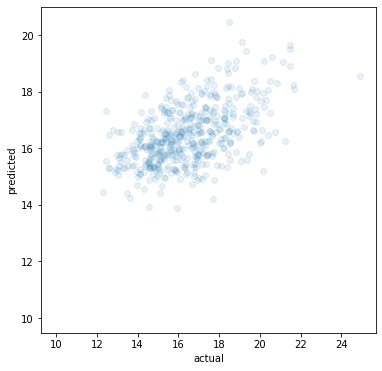

In [573]:
#ridge model - actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_set_pred_r2, alpha=.1);
plt.plot(np.linspace(10,18,1), np.linspace(10,18,1))
plt.xlabel('actual')
plt.ylabel('predicted');

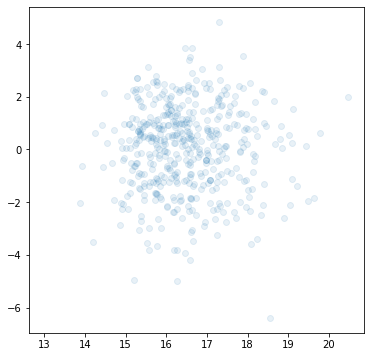

In [574]:
#predicted vs residuals
test_set_resid_r2 = test_set_pred_r2-y_test
plt.figure(figsize=(6,6))
plt.scatter(test_set_pred_r2, test_set_resid_r2, alpha=.1);
plt.plot(np.linspace(13,18,1), np.linspace(-4,4,1));

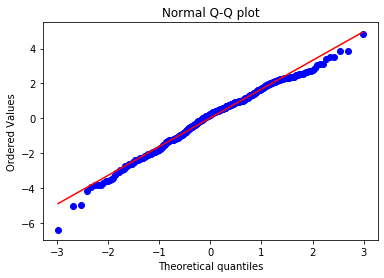

In [575]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(test_set_resid_r2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [576]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)

# lasso_model2 = LassoCV(alphas = alphavec, cv=5)
# lasso_model2.fit(X_tr, y_train)

a = {'alpha':alphavec}
lasso_model2 = GridSearchCV(Lasso(), param_grid=a, cv=5)
lasso_model2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.203...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [577]:
alpha_lm2 = lasso_model2.best_estimator_.alpha
alpha_lm2

0.01

In [578]:
list(zip(col_names, lasso_model2.best_estimator_.coef_))

[('number_of_discharges', -0.09098446997412873),
 ('mortality_national_comparison_Below_the_national_average',
  -0.5962635907723505),
 ('mortality_national_comparison_Same_as_the_national_average',
  -0.563965690506299),
 ('safety_of_care_national_comparison_Below_the_national_average',
  0.12858811231785905),
 ('safety_of_care_national_comparison_Same_as_the_national_average',
  -0.10262881176971268),
 ('patient_experience_national_comparison_Below_the_national_average',
  0.5274797912714908),
 ('patient_experience_national_comparison_Same_as_the_national_average',
  0.15625479031192624),
 ('timeliness_of_care_national_comparison_Below_the_national_average',
  0.35806818119620304),
 ('timeliness_of_care_national_comparison_Same_as_the_national_average',
  0.05435609452922976),
 ('CRTFD_BED_CNT', 0.28965088945476003),
 ('MHIxSCH', -0.3985179020996262)]

In [579]:
# Make predictions on the test set using the new model
test_set_pred_l2 = lasso_model2.predict(X_test)

In [580]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred_l2)

1.3298592466902246

In [581]:
r2_score(y_test, test_set_pred_l2)

0.2821382053377489

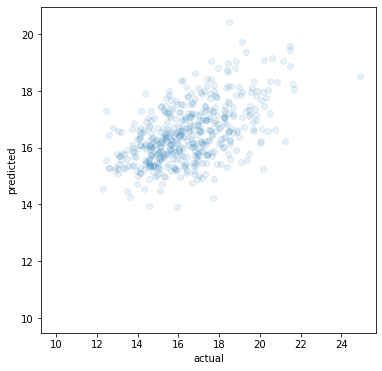

In [582]:
#lasso model - actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test,test_set_pred_l2, alpha=.1);
plt.plot(np.linspace(10,18,1), np.linspace(10,18,1))
plt.xlabel('actual')
plt.ylabel('predicted');

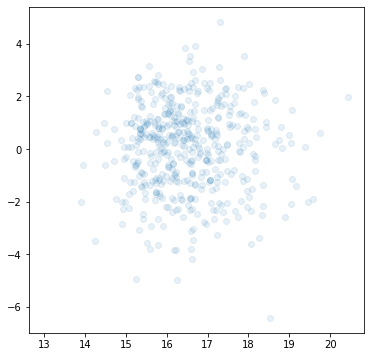

In [583]:
#predicted vs residuals
test_set_resid_l2 = test_set_pred_l2-y_test
plt.figure(figsize=(6,6))
plt.scatter(test_set_pred_l2, test_set_resid_l2, alpha=.1);
plt.plot(np.linspace(13,18,1), np.linspace(-4,4,1));

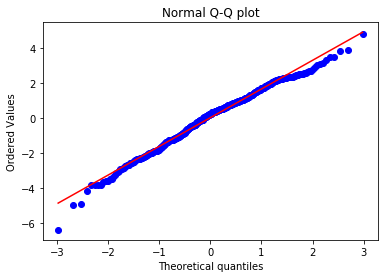

In [584]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(test_set_resid_l2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [585]:
# Lars path visualization
# std = StandardScaler()
# std.fit(X_train.values)
# X_tr = std.transform(X_train.values)

## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train, y_train.values, method='lasso')


Computing regularization path using the LARS ...


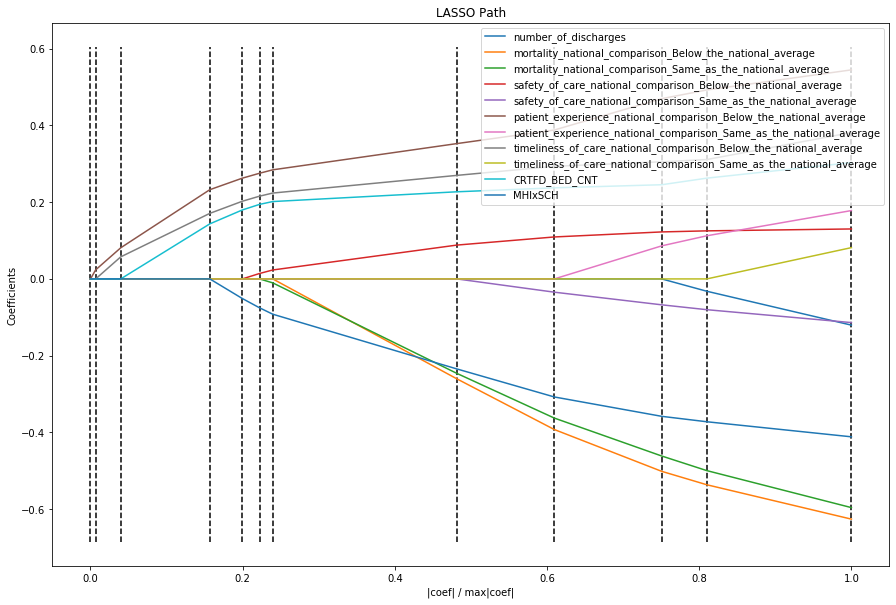

In [586]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(col_names, loc = 'upper right')
plt.show()

In [587]:
elnet_model2 = GridSearchCV(ElasticNet(), param_grid=a, cv=5)
elnet_model2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1....
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [588]:
alpha_en2 = elnet_model2.best_estimator_.alpha
alpha_en2

0.01

In [589]:
# Make predictions on the test set using the new model
test_set_pred_e2 = elnet_model2.predict(X_test)

In [590]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred_e2)

1.3297263757475748

In [591]:
r2_score(y_test, test_set_pred_e2)

0.2821050870802627

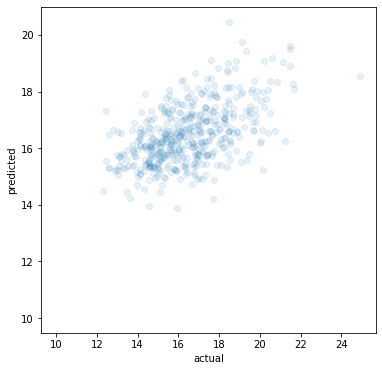

In [592]:
#lasso model - actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test,test_set_pred_e2, alpha=.1);
plt.plot(np.linspace(10,18,1), np.linspace(10,18,1))
plt.xlabel('actual')
plt.ylabel('predicted');

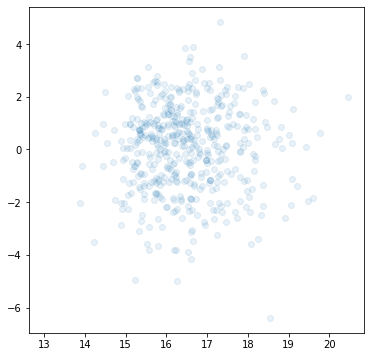

In [593]:
#predicted vs residuals
test_set_resid_e2 = test_set_pred_e2-y_test
plt.figure(figsize=(6,6))
plt.scatter(test_set_pred_e2, test_set_resid_e2, alpha=.1);
plt.plot(np.linspace(13,18,1), np.linspace(-4,4,1));

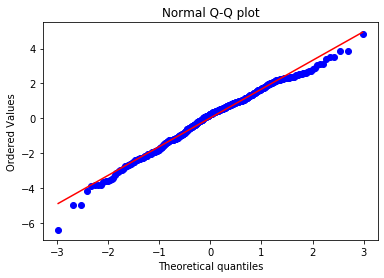

In [594]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(test_set_resid_e2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Validation

In [595]:
lm = LinearRegression()
lm_ridge = Ridge(alpha=alpha_rm2)
lm_lasso = Lasso(alpha=alpha_lm2)
lm_elnet = ElasticNet(alpha=alpha_en2)

In [596]:
kf = KFold(n_splits=5, shuffle=True)

print(f"Linear Regression mean val R^2: {np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')):.4f}")
print(f"Ridge Regression mean val R^2: {np.mean(cross_val_score(lm_ridge, X, y, cv=kf, scoring='r2')):.4f}")
print(f"Lasso Regression mean val R^2: {np.mean(cross_val_score(lm_lasso, X, y, cv=kf, scoring='r2')):.4f}")
print(f"Elastic Net Regression mean val R^2: {np.mean(cross_val_score(lm_elnet, X, y, cv=kf, scoring='r2')):.4f}")

Linear Regression mean val R^2: 0.2446
Ridge Regression mean val R^2: 0.2440
Lasso Regression mean val R^2: 0.2421
Elastic Net Regression mean val R^2: 0.2437


In [597]:
cross_val_score(lm_lasso, X, y, cv=kf, scoring='r2')

array([0.24919432, 0.21520463, 0.27828197, 0.23519393, 0.24969357])

## Final model performance

In [598]:
#Linear Regression
lm.fit(X_train,y_train)
print(f'Linear Regression v1 val R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression v1 val R^2: 0.282


In [599]:
#GridSearchCV Ridge model
lm_ridge.fit(X_train,y_train)
print(f'Ridge Regression v2 val R^2: {lm_ridge.score(X_test, y_test):.3f}')

Ridge Regression v2 val R^2: 0.282


In [600]:
#GridSearchCV Lasso model
lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression v2 val R^2: {lm_lasso.score(X_test, y_test):.3f}')

Lasso Regression v2 val R^2: 0.282


In [601]:
#GridSearchCV Elastic Net model
lm_elnet.fit(X_train,y_train)
print(f'Elastic Net Regression v2 val R^2: {lm_lasso.score(X_test, y_test):.3f}')

Elastic Net Regression v2 val R^2: 0.282


In [602]:
# list(zip(col_names, lm_ridge.best_estimator_.coef_))